<a href="https://colab.research.google.com/github/Ali-mohammadi-design/Prompt_Engineering_and_Machine_Learning/blob/main/Prompt_engineering_AWS_Bedrock_Prompt_to_image_Titan_image_generation_Model_Variation_ability_ipynb_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this training we want to use Titan Amazon Image Generation. You can find all the documentation of this LLM in the following link:

https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-image.html


Note: the quality of the images in this LLM could be set as standard or premium.

Note: The most important feature of the titan image generator is the variation feature that it has!!

In [1]:
! pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.6 MB/s eta 0:00:00


In [2]:
import boto3
s3=boto3.resource('s3')

In [4]:
import os
aws_access_key_id=os.environ['aws_access_key_id']
aws_secret_access_key=os.environ['aws_secret_access_key']

In [5]:
s3.buckets.all()

s3.bucketsCollection(s3.ServiceResource(), s3.Bucket)

In [6]:
s3 = boto3.resource('s3',
         aws_access_key_id=aws_access_key_id,
         aws_secret_access_key= aws_secret_access_key)

In [7]:
bedrock_runtime= boto3.client(aws_access_key_id=aws_access_key_id,aws_secret_access_key= aws_secret_access_key, service_name='bedrock-runtime', region_name='us-east-1')


In [46]:
pos_prompt='Please draw a flying huse that can flly easily from one location to another location'

In [47]:
parameters= {
    "taskType": "TEXT_IMAGE",
    "textToImageParams": { "text": pos_prompt },
    "imageGenerationConfig": {
        "numberOfImages": 1,
        "quality": "premium",
        "height": 512,
        "width": 512,
        "seed": 0
    }
}

In [48]:
import json

In [49]:
request=json.dumps(parameters)

In [50]:
response=bedrock_runtime.invoke_model(body=request, modelId='amazon.titan-image-generator-v1')

In [51]:
answer=response.get('body').read()
response_body=json.loads(answer)

In [52]:
import PIL
import base64
from PIL import Image

In [53]:
base_64_image=base64.b64decode(response_body['images'][0])

In [54]:
file_path='flying_house.png'

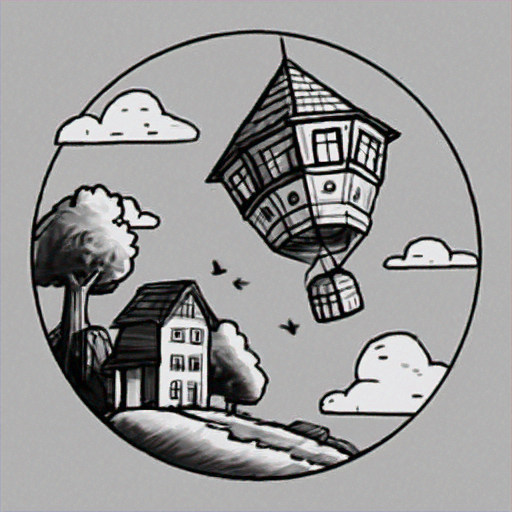

In [55]:
with open(file_path,'wb') as file:
  file.write(base_64_image)
Image.open(file_path)

Note: Titan has a specific feature to vary the picture. You can see the image variation section of the documentation of this model.

If you have the image as png you have to encide it back and decode again.

In [58]:
with open(file_path,'rb') as f:
  content=f.read()
  image_string=base64.b64encode(content).decode('utf-8')

In [85]:
image_variation_prompt={
     "taskType": "IMAGE_VARIATION",
     "imageVariationParams": {
         "text": "the house should use something like helicopter and the part of the home that help it to fly should be visible. the picture should be realisitic",
         "images": [image_string],
     },
     "imageGenerationConfig": {
         "numberOfImages": 1,
         "height": 512,
         "width": 512,
         "cfgScale": 9,
         "quality": 'premium'
     }
}

In [86]:
request=json.dumps(image_variation_prompt)

In [87]:
response=bedrock_runtime.invoke_model(body=request, modelId='amazon.titan-image-generator-v1')

In [88]:
answer=response.get('body').read()
response_body=json.loads(answer)

In [89]:
base_64_image=base64.b64decode(response_body['images'][0])

In [90]:
file_path2='flying_house_varied.png'

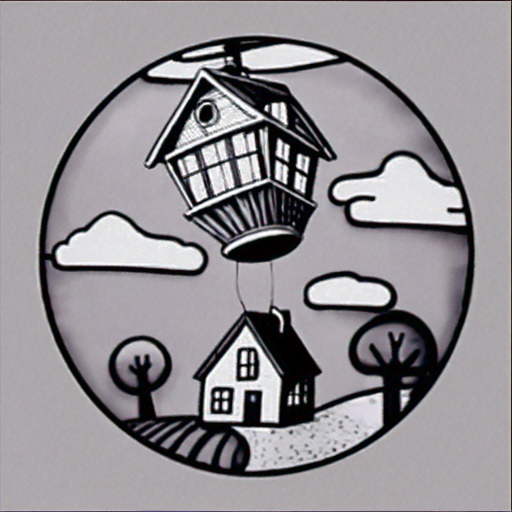

In [91]:
with open(file_path2,'wb') as file:
  file.write(base_64_image)
Image.open(file_path2)